# Intro to NumPy

We're going to build on the work you did in [`Ex_Functions`](Ex_Functions.ipynb).

Recall our functions from that notebook:

In [13]:
from utils import vp_from_dt, impedance, rc_series

In [15]:
import utils

Let's load a bit of data:

In [18]:
from welly import Well

w = Well.from_las('../data/R-39.las')

In [21]:
import numpy as np

dt = np.array(w.data['DT4P'])
rhob = np.array(w.data['RHOB'])

In [26]:
w

In [23]:
dt.shape

(7843,)

In [27]:
dt[1000:1020]

array([ 302.5828,  301.2728,  298.5636,  288.194 ,  281.4649,  279.1137,
        269.2634,  276.066 ,  279.5238,  284.2258,  286.6032,  287.4814,
        275.9168,  272.7144,  267.2059,  263.389 ,  263.9553,  266.1015,
        273.3557,  270.7604])

In [29]:
dt[:20]

array([ 311.0284,  311.0284,  311.0284,  311.0284,  311.0284,  311.0284,
        311.0284,  311.0284,  311.0284,  311.0284,  311.0284,  311.0284,
        311.0284,  311.0284,  311.1205,  309.6592,  314.1266,  319.7447,
        322.0702,  323.9139])

These are NumPy arrays, which we'll meet properly in a minute. For now, just notice that they look a lot like lists... which should mean that our functions work on them.

In [31]:
vp = vp_from_dt(dt)

Our functions do work on them!

In [32]:
z = impedance(vp, rhob)
rc = rc_series(z)

In [36]:
np.array(rc).size

7842

## What is NumPy?

As you can see, NumPy's `ndarray` data structures are a lot like lists. We can even throw them into the functions we wrote for lists.

As we'll see, however, they have a big advantage over lists. The punchline is, we're going to want to re-write our functions.

We instantiate an `ndarray` with a list, or any sequence:

In [38]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [39]:
a[0], a[-1]

(1, 5)

In [40]:
a.append(6)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

OK, so they're not exactly like lists. Indeed, there's one very big difference. 

Recall that trying to multiply a list doesn't do what you want it to do:

In [41]:
print(10 * [1, 2, 3, 4, 5])

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Instead, to multiply the numbers in a list by 10, we have to do something like this:

In [42]:
[10 * n for n in a]

[10, 20, 30, 40, 50]

But NumPy has a superpower: ufunc. What the heck is ufunc? It doesn't really matter, the point is what it enables: elementwise arithmetic. 

In [44]:
a

array([1, 2, 3, 4, 5])

In [45]:
10 * a

array([10, 20, 30, 40, 50])

This proves to be A Very Powerful Thing.

NumPy contains lots of other tools, including convolution, interpolation, and linear algebra operators, but most of what we do with it every day revolves around the `ndarray`, so we're going to spend a bit of time getting to know them.

## The `ndarray`

First, let's look at some ways to generate arrays:

In [46]:
np.ones(10), np.zeros(10), np.ones_like([2, 4, 6, 8])

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1, 1, 1, 1]))

In [48]:
np.ones(10) * np.pi

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265])

In [54]:
np.arange(0, 10, 1).dtype

dtype('int64')

In [52]:
np.linspace(0, 9, 10).dtype

dtype('float64')

In [56]:
np.arange(10) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [55]:
np.arange(10) + np.arange(0, 100, 10)

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99])

In [61]:
np.arange(10) + np.arange(0, 110, 10)

ValueError: operands could not be broadcast together with shapes (10,) (11,) 

In [62]:
# What's broadcasting?
np.arange(10) + 100

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [64]:
np.arange(10) + np.arange(0, 20, 2)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [67]:
# 2D array
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [71]:
# 2D array multiplied by 1D array
np.ones((3,3)) * np.array([[1, 10, 100]])

array([[   1.,   10.,  100.],
       [   1.,   10.,  100.],
       [   1.,   10.,  100.]])

NumPy chooses the correct orientation for a 1D vector when performing a dot product with a 2D array:

In [132]:
np.ones((3,3)) @ np.array([1, 10, 100])

array([ 111.,  111.,  111.])

In [124]:
np.array([1, 10, 100]) @ np.array([1, 10, 100])

10101

In [83]:
# Dot product with a column vector
np.ones((3,3)) @ np.array([1, 10, 100]).reshape((3,1))

array([[ 111.],
       [ 111.],
       [ 111.]])

In [84]:
# Dot product with a column vector
np.ones((3,3)) @ np.array([[1], [10], [100]])

array([[ 111.],
       [ 111.],
       [ 111.]])

In [86]:
# Dot product
np.dot(np.ones((3,3)), np.array([1, 10, 100]))

array([ 111.,  111.,  111.])

In [87]:
theta = np.arange(0, np.pi, 0.1)
y = np.sin(theta)**2
y

array([ 0.        ,  0.00996671,  0.0394695 ,  0.08733219,  0.15164665,
        0.22984885,  0.31882112,  0.41501643,  0.51459976,  0.61360105,
        0.70807342,  0.79425056,  0.86869686,  0.92844438,  0.97111117,
        0.99499625,  0.99914739,  0.9833991 ,  0.94837921,  0.89548386,
        0.82682181,  0.74513041,  0.65366643,  0.55607626,  0.45625051,
        0.35816891,  0.26574166,  0.18265356,  0.11221706,  0.05724024,
        0.01991486,  0.00172895])

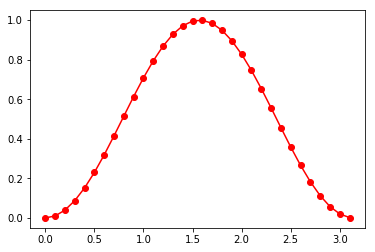

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(theta, y, 'r-o')

In [92]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [93]:
a = np.ones((5, 3))
a[:, 0] = 100
a

array([[ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.]])

In [94]:
a[:, 1]

array([ 1.,  1.,  1.,  1.,  1.])

In [95]:
a.T

array([[ 100.,  100.,  100.,  100.,  100.],
       [   1.,    1.,    1.,    1.,    1.],
       [   1.,    1.,    1.,    1.,    1.]])

In [96]:
a.shape

(5, 3)

In [126]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [131]:
np.ones((2, 3)) @ np.ones((2, 3)).T

array([[ 3.,  3.],
       [ 3.,  3.]])

In [99]:
a[:, 2]

array([ 2,  7, 12, 17, 22])

In [102]:
np.random.random((10, 10))

array([[ 0.5729952 ,  0.58997891,  0.09402283,  0.62778258,  0.97542632,
         0.41128688,  0.00540845,  0.80691544,  0.89009999,  0.158796  ],
       [ 0.95022944,  0.16614821,  0.87482569,  0.04601942,  0.76800816,
         0.24150023,  0.77262463,  0.83957858,  0.98879687,  0.86189972],
       [ 0.08284789,  0.46412603,  0.04443714,  0.66600878,  0.39847613,
         0.06279955,  0.86102051,  0.99536995,  0.80585135,  0.76906187],
       [ 0.12894449,  0.70542076,  0.06173292,  0.13034789,  0.88157658,
         0.67338681,  0.7724876 ,  0.88987914,  0.08757396,  0.2732248 ],
       [ 0.32115676,  0.95077967,  0.9073589 ,  0.09328479,  0.94458961,
         0.08757022,  0.77863413,  0.98104322,  0.2460133 ,  0.22932982],
       [ 0.12610985,  0.44376985,  0.64298231,  0.99290893,  0.84241894,
         0.24860425,  0.61107079,  0.21464104,  0.97450953,  0.52163777],
       [ 0.50929543,  0.12962415,  0.89276422,  0.80625548,  0.70865122,
         0.13713746,  0.26397899,  0.48326523

Draw porosities from a normal distribution.

In [103]:
np.random.normal(loc=20, scale=3, size=10)

array([ 19.1764553 ,  11.37326226,  15.25465641,  20.11277415,
        16.51868384,  20.10269587,  23.920069  ,  21.11425422,
        23.20012424,  24.53629994])

In [104]:
np.nan

nan

In [105]:
np.isnan(np.nan), np.isnan(0)

(True, False)

In [109]:
a.dtype

dtype('float64')

In [107]:
a = a.astype(float)

In [111]:
# Boolean arrays
a > 12

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [113]:
a[a > 12] = np.nan
a

/home/matt/anaconda3/envs/geocomp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

In [ ]:
# Indexing with arrays
a = np.arange(10)
b = np.array([3, 4, 5])
a[b]

In [115]:
np.isnan(np.nan)

True

In [117]:
c = np.random.randint(3, size=(5,5))
c

array([[1, 1, 0, 2, 0],
       [1, 2, 0, 1, 1],
       [1, 2, 2, 1, 1],
       [1, 2, 2, 2, 1],
       [0, 2, 0, 2, 0]])

In [118]:
d = np.array([111,222,333])
d

array([111, 222, 333])

In [119]:
# Fancy indexing
d[c]

array([[222, 222, 111, 333, 111],
       [222, 333, 111, 222, 222],
       [222, 333, 333, 222, 222],
       [222, 333, 333, 333, 222],
       [111, 333, 111, 333, 111]])

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>